# **THE SPARKS FOUNDATION - INTERNSHIP**

Graduate Rotational Internship Program

> ### **Data Science & Business Analytics**

This Notebook performs EDA (Exploratory Data Analysis) on SampleSuperstore Data.

## **Task - 3 (Level - Beginner)**


> ## **EDA on SampleSuperstore Data** 
***
> ## Objective
* Find out weak areas where you can work to make more profit.
* What all the business problems you can derive by EDA? 
***
> ## About The Data
* This 'SampleSuperstore' data contains 13 columns and 9,994 rows
* Data source: [Link](https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view)
* Data Format: .csv

### **Intern - Swati Gulati**

**Exploratory Data Analysis (EDA)**

* It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. 
* It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

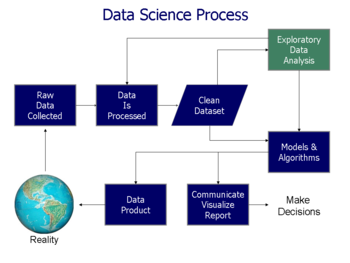

In [91]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Collection & Processing

In [92]:
# Read & view the data 
data = pd.read_csv("/content/SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [93]:
# View rows and columns
data.shape

(9994, 13)

In [94]:
# Getting some basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Data does not contain any missing values.

In [95]:
# Getting statistical measures of the data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [96]:
print("total number of null values = ",data.isnull().sum().sum())

total number of null values =  0


In [97]:
# Find the dtypes of dataset
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [98]:
# Find all columns inside the dataset
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [99]:
# Check the dataset for duplicate and dropping element
data.duplicated().sum()

17

In [100]:
# Drop all the 17 duplicates
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [101]:
# .nunique() - Function return Series with number of distinct observations over requested axis
# axis=0 (rows) & axis=1 (columns)
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

2. Correlation

In [102]:
correlation = data.corr()

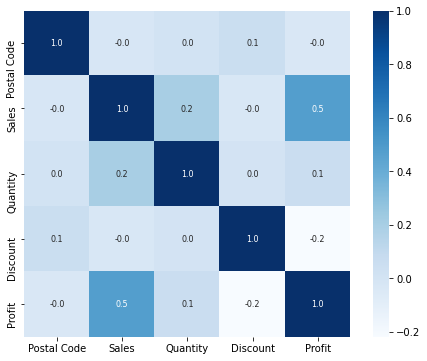

In [103]:
#Constructing a heatmap to understand the values
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, fmt='.1f', cbar=True, square=True, annot=True,  cmap='Blues', annot_kws={'size':8})

Conclusion:

1. Postal Code is zero & negative correlated to other features.
2. Sales is positively correlated to Quantity & Profit -> 0.2 & 0.5 resp.
3. Discount and Profit are highly negatively correlated to each other.

In [104]:
# Find the Series containing counts of unique values
data.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales    Quantity  Discount  Profit  
Second Class    Corporate    United States  Chicago        Illinois    60653        Central  Office Supplies  Binders       3.564    3         0.8       -6.2370     2
Standard Class  Consumer     United States  Salem          Oregon      97301        West     Office Supplies  Paper         10.368   2         0.2        3.6288     2
                                            San Francisco  California  94122        West     Office Supplies  Paper         12.840   3         0.0        5.7780     2
                Corporate    United States  Seattle        Washington  98105        West     Office Supplies  Paper         19.440   3         0.0        9.3312     2
                Home Office  United States  Columbus       Ohio        43229        East     Furniture        Chairs        281.372  2         0.3       -12.0588    2
   

In [105]:
# Drop the column
col = ['Postal Code']
dr_data = data.drop(col, axis=1)

In [106]:
# View after droping the column
dr_data

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


3. Data Visualization

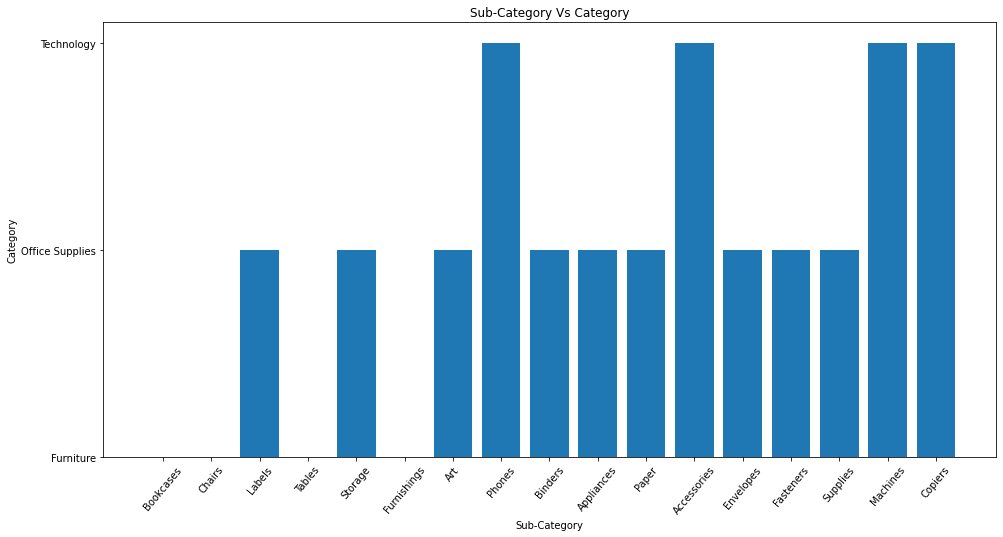

In [127]:
# Sub-Category Vs Category

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=data)
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.title("Sub-Category Vs Category")
plt.xticks(rotation=50)
plt.show()

Maximum items in Sub-Category purchased by Office Supplies in Category

In [108]:
# State

print(dr_data['State'].value_counts())

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

* **Ticks** are the values used to show specific points on the coordinate axis. It can be a number or a string.

* **.xticks() Function -** The annotate() function in pyplot module of matplotlib library is used to get and set the current tick locations and labels of the **x-axis.**

* **.yticks() Function -** The annotate() function in pyplot module of matplotlib library is used to get and set the current tick locations and labels of the y-axis.

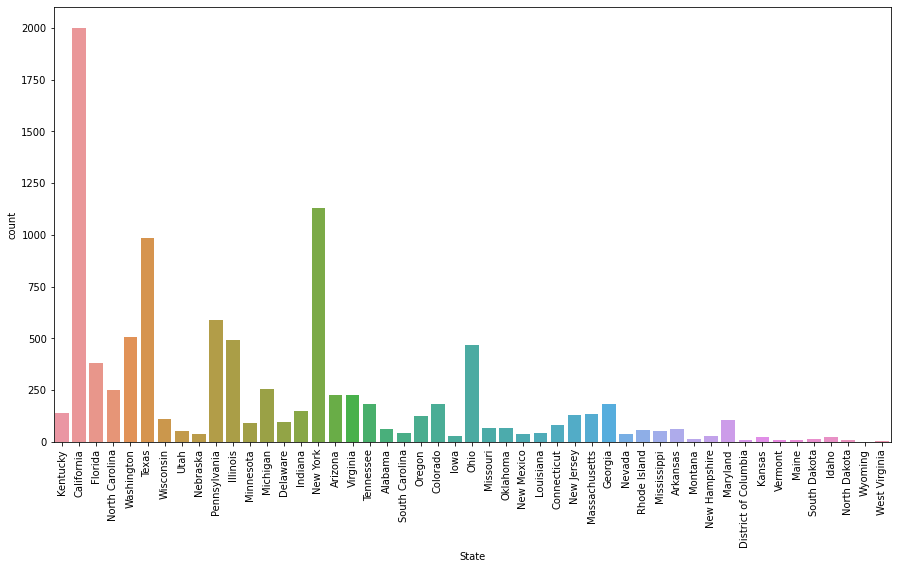

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(x=dr_data['State'])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.show()

Maximum item purchased in State- California

In [110]:
# Region

print(dr_data['Region'].value_counts())

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


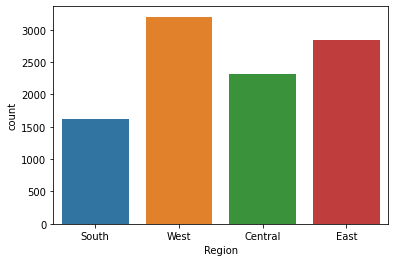

In [111]:
sns.countplot(dr_data['Region'])

Maximum sales were done in the West Region

In [112]:
# Sub-Category

print(dr_data['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

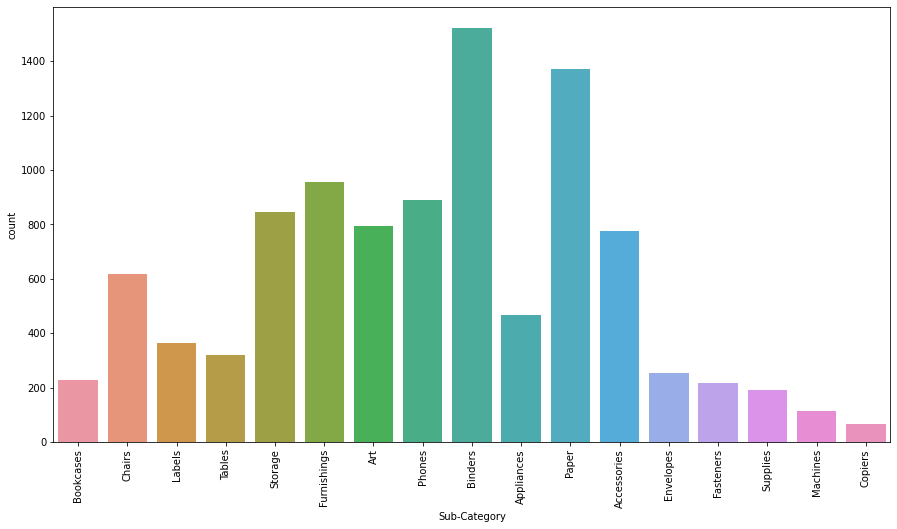

In [113]:
plt.figure(figsize=(15,8))
sns.countplot(dr_data['Sub-Category'])
plt.xticks(rotation=90)

The maximum number of item was sold is Binders

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


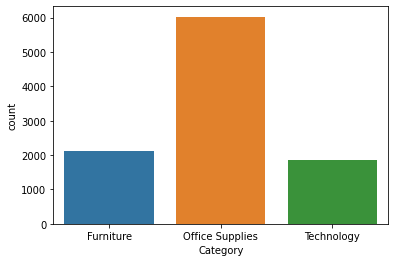

In [114]:
# Category

print(dr_data['Category'].value_counts())
sns.countplot(dr_data['Category'])

In [115]:
# City

print(dr_data['City'].value_counts())

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Ontario            1
Springdale         1
Champaign          1
Grand Island       1
Manhattan          1
Name: City, Length: 531, dtype: int64


United States    9994
Name: Country, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


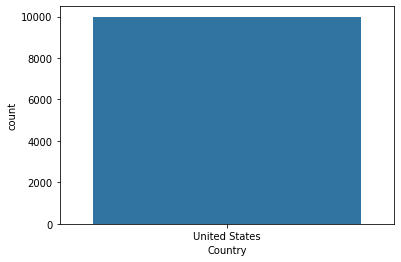

In [116]:
# Country

print(dr_data['Country'].value_counts())
sns.countplot(dr_data['Country'])

In [117]:
# Segment

print(dr_data['Segment'].value_counts())

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


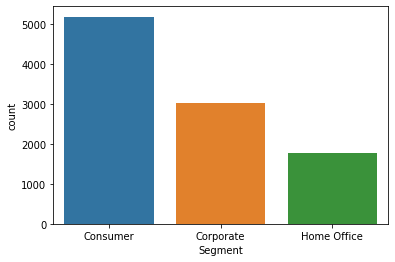

In [118]:
sns.countplot(dr_data['Segment'])

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


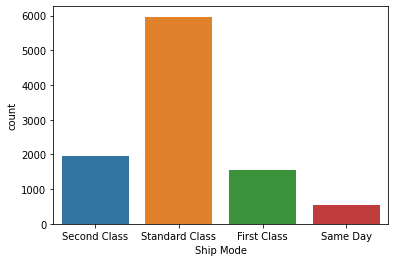

In [119]:
# Ship Mode	

print(dr_data['Ship Mode'].value_counts())
sns.countplot(dr_data['Ship Mode'])

Text(0.5, 1.0, 'Sub-Category Vs Sales')

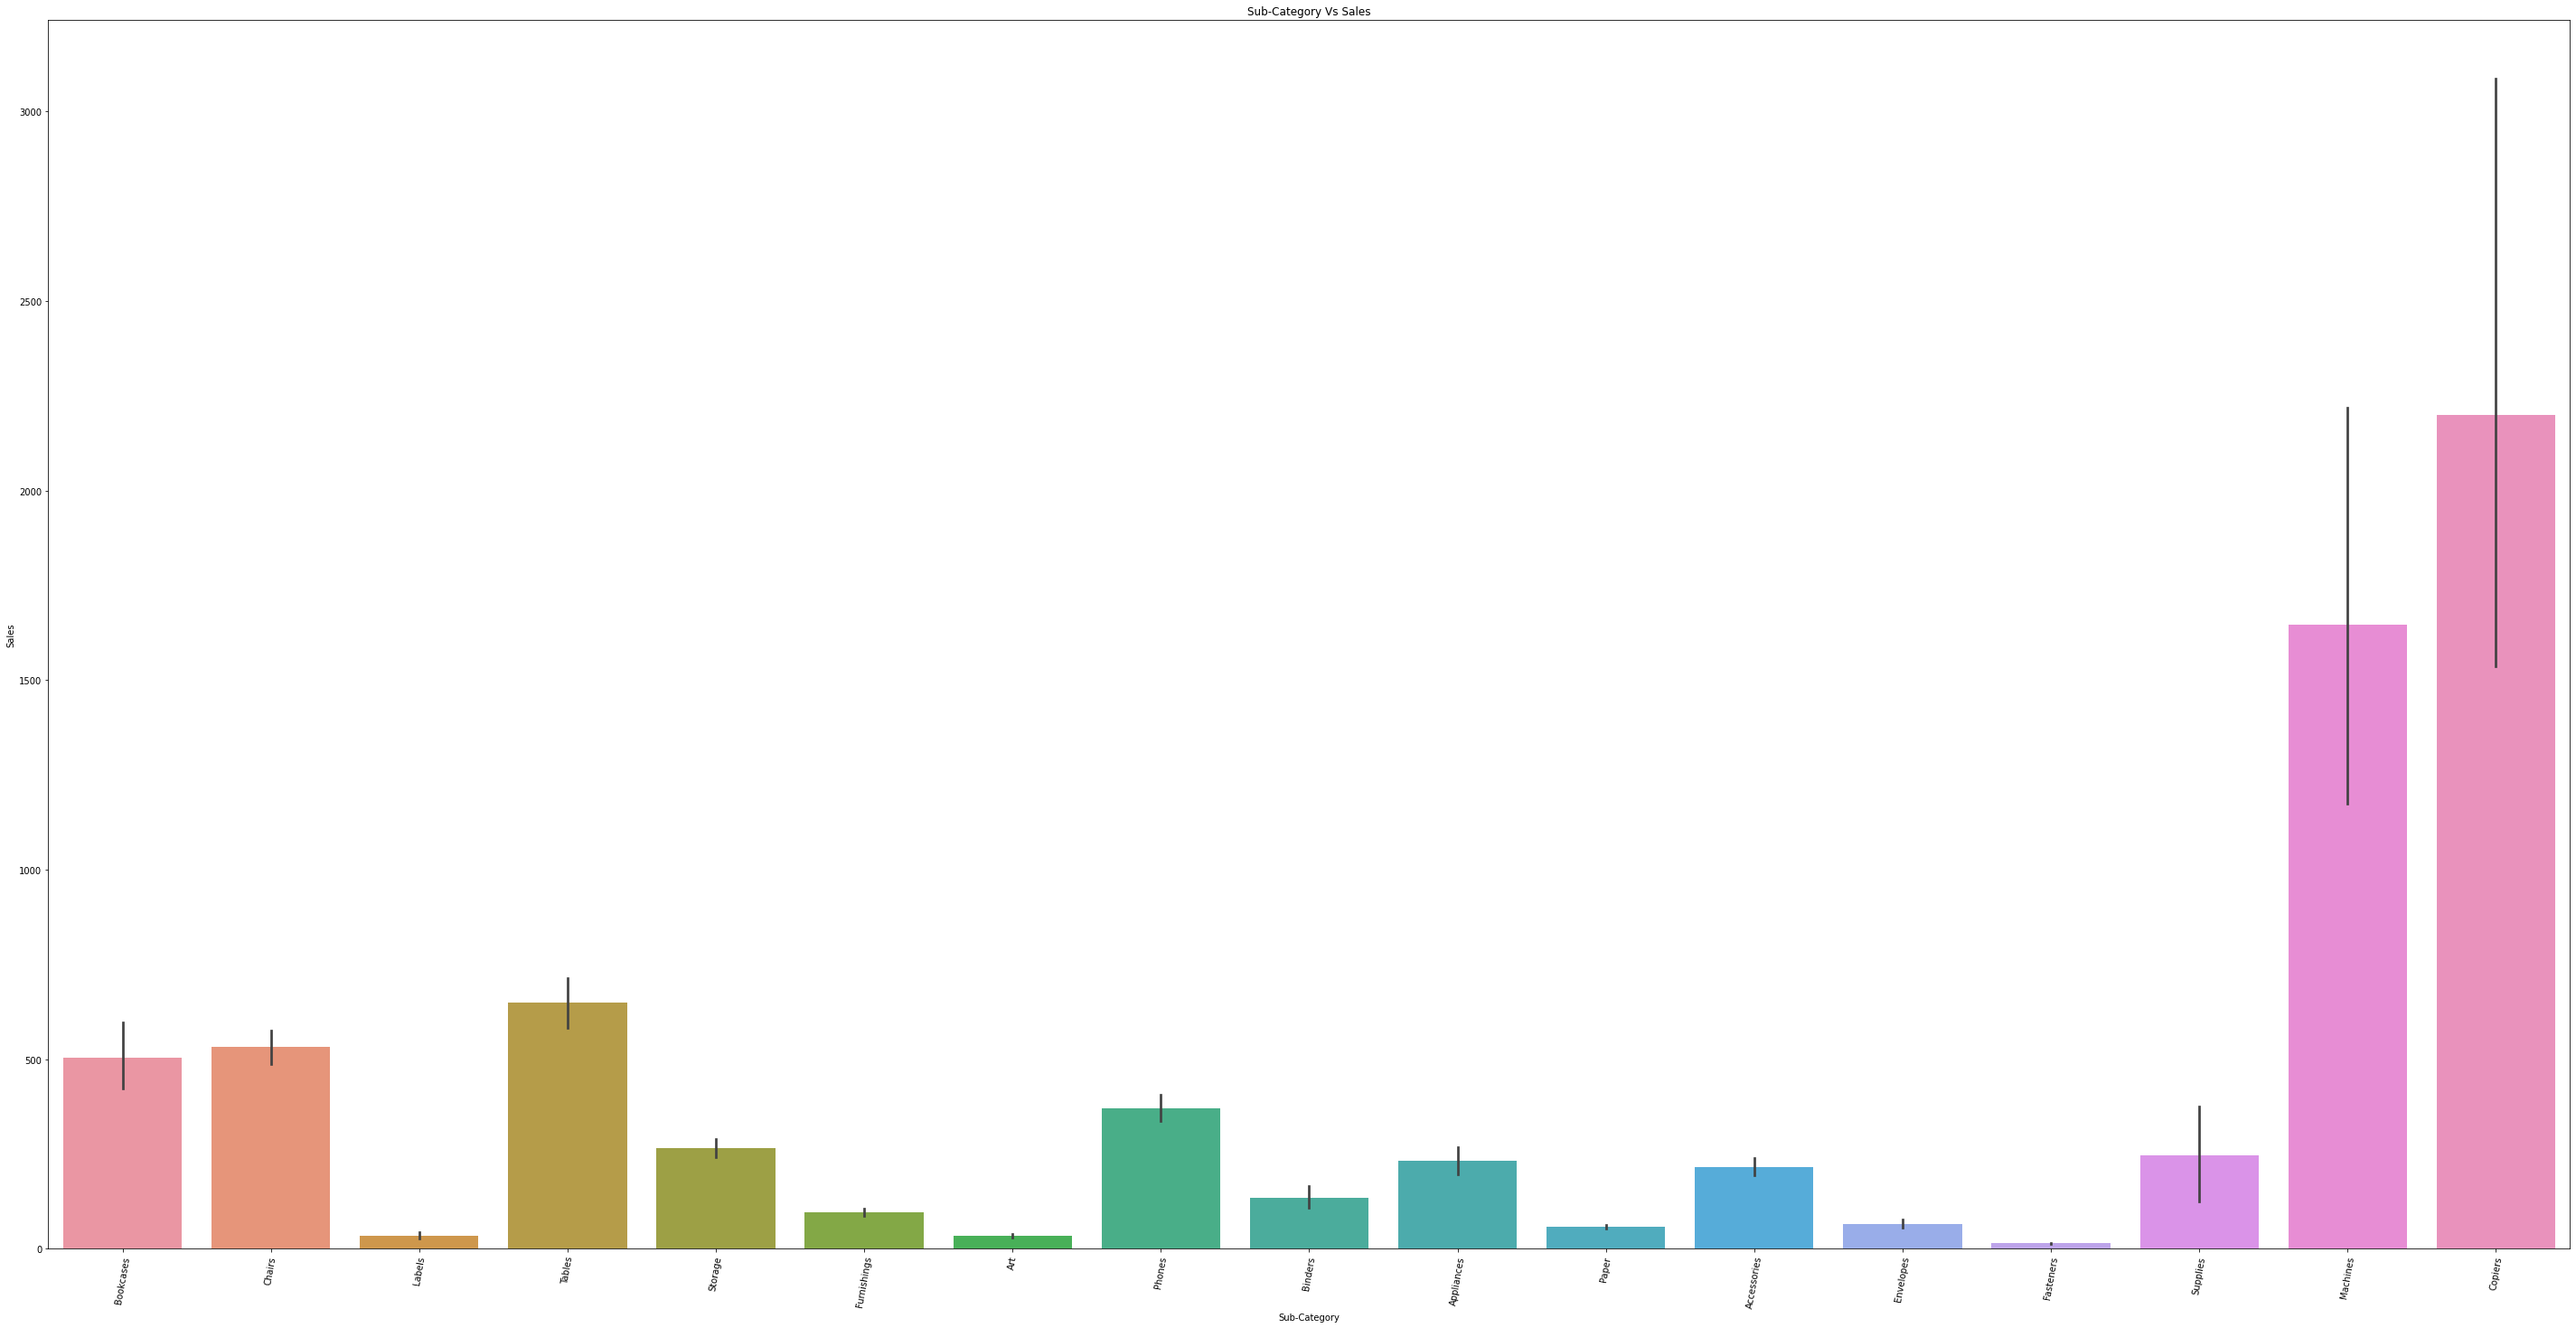

In [120]:
# Sub-Category Vs Sales

plt.figure(figsize=(50,25))
sns.barplot(x=dr_data['Sub-Category'], y=dr_data['Sales'])
plt.xticks(rotation=80)
plt.title("Sub-Category Vs Sales")

Maximaum Sale in Sub-Category is Copies & Machines

Text(0.5, 1.0, 'Sub-Category Vs Profit')

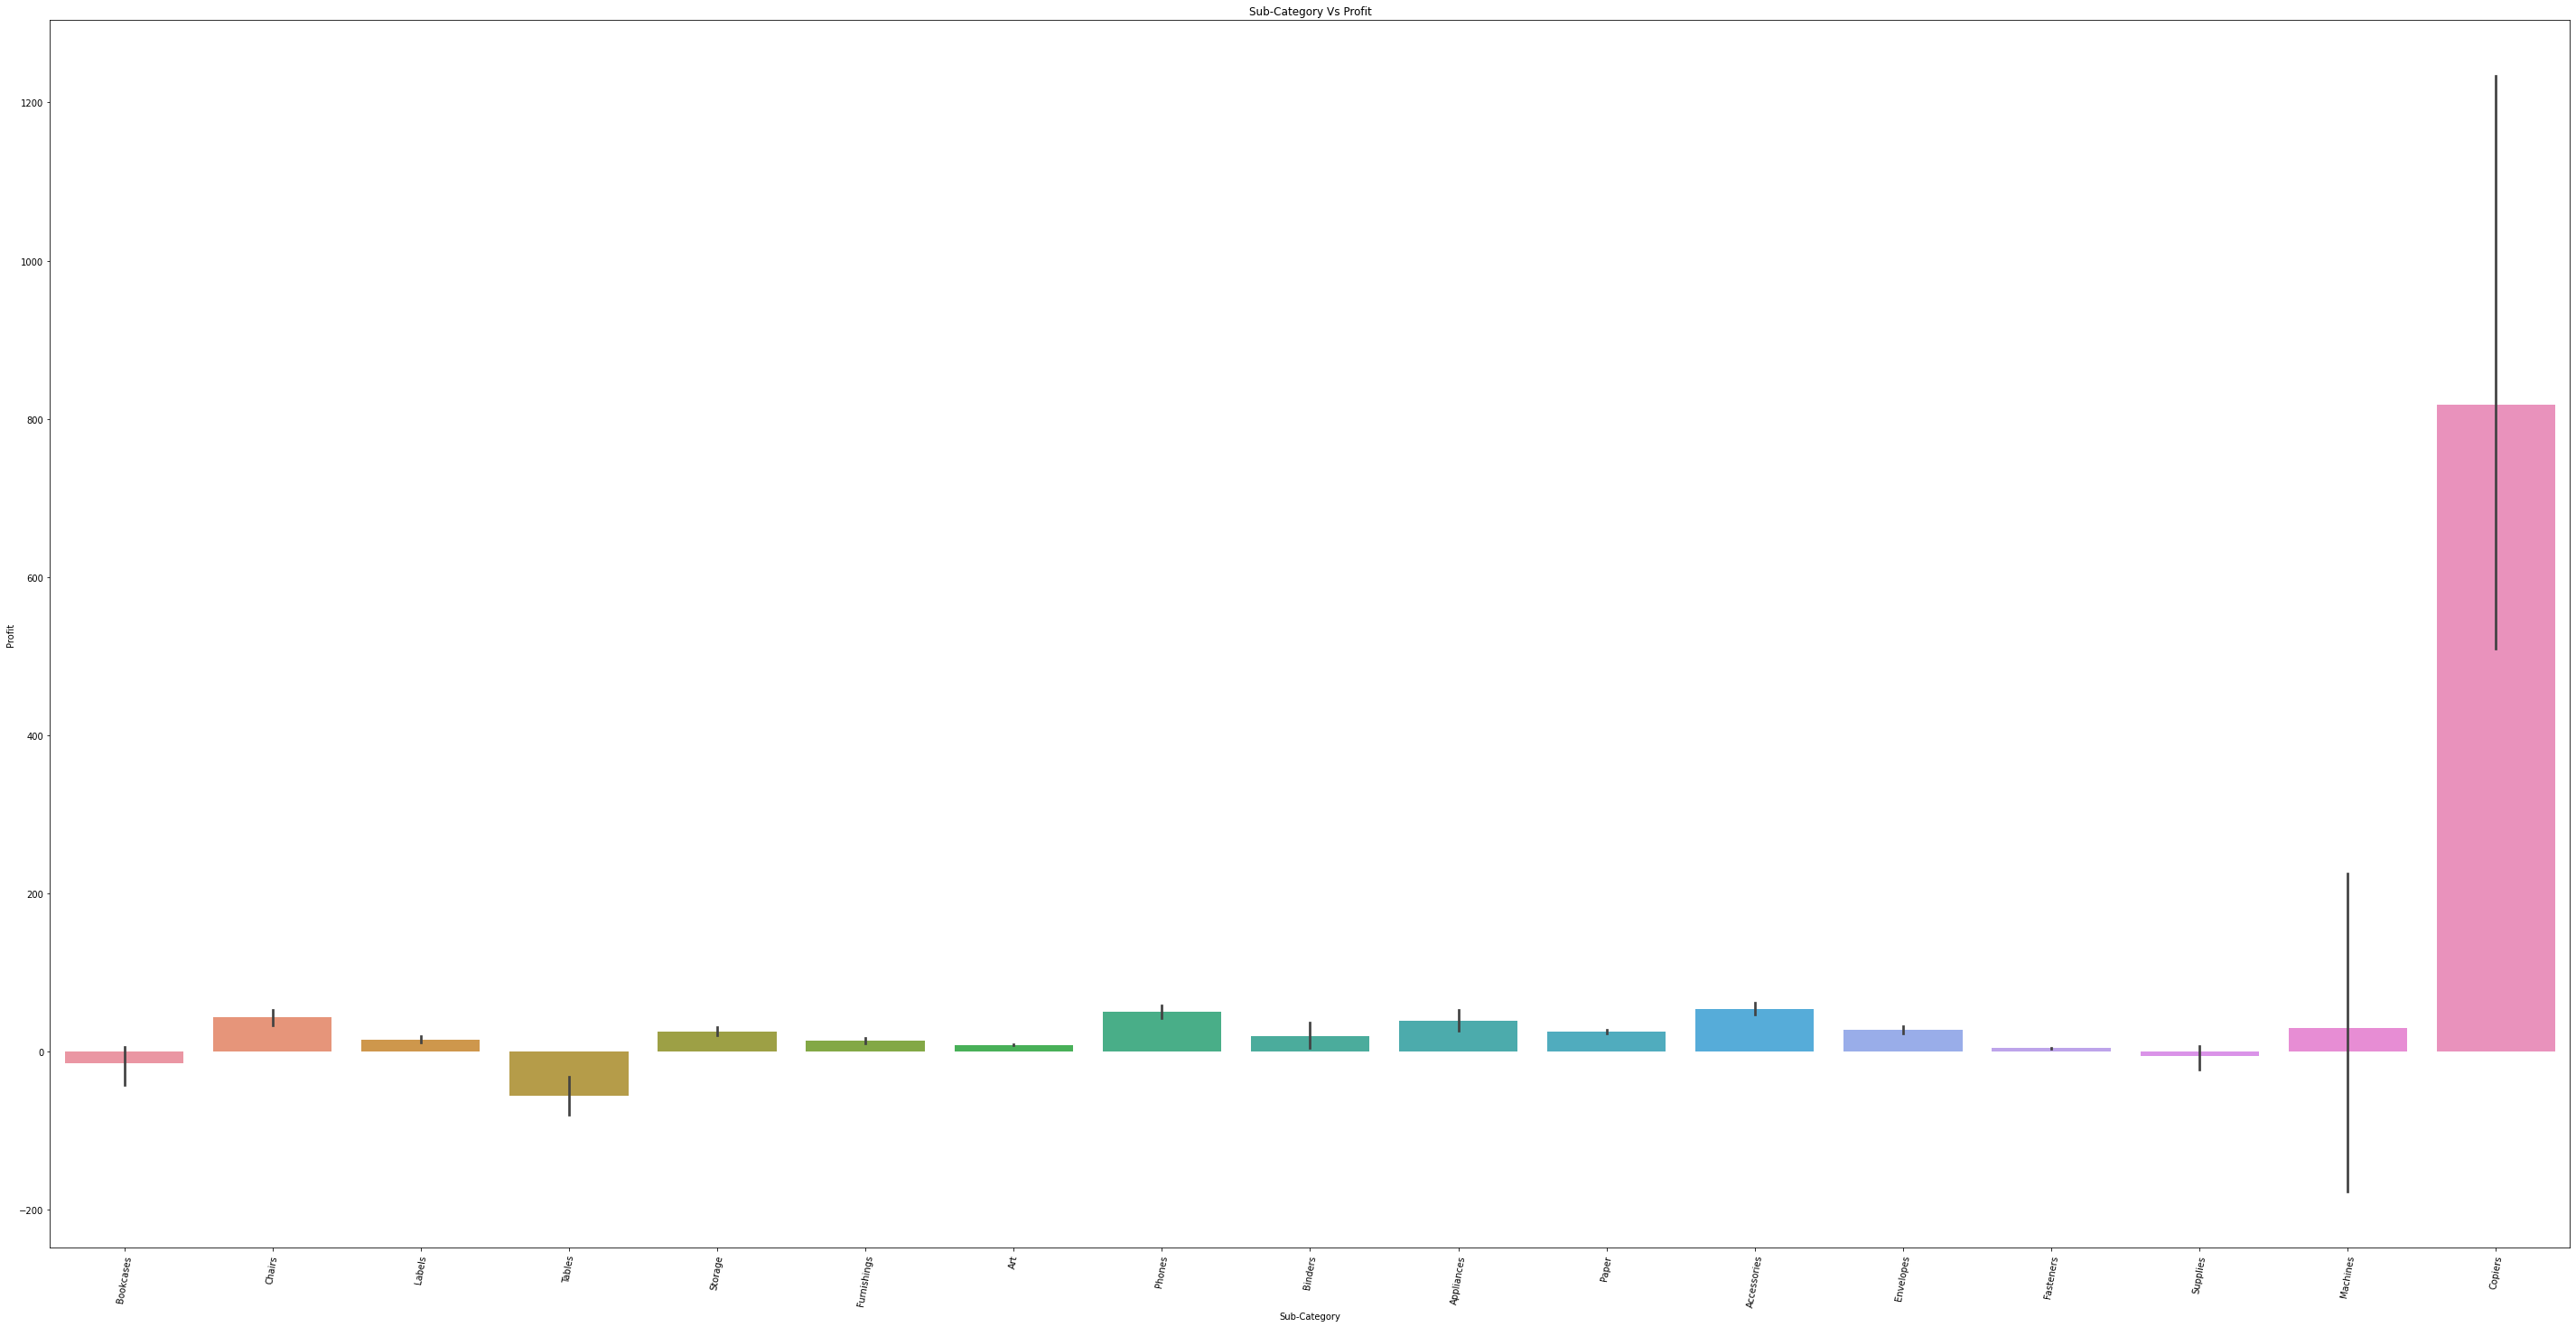

In [121]:
# Sub-Category Vs Profit

plt.figure(figsize=(50,25))
sns.barplot(x=dr_data['Sub-Category'], y=dr_data['Profit'])
plt.xticks(rotation=80)
plt.title("Sub-Category Vs Profit")

Maximum Profit is get in Sub-Category is Copies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


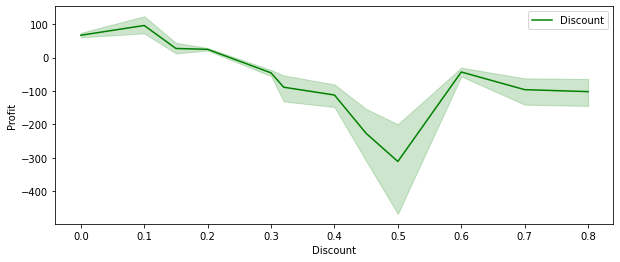

In [122]:
# Profit Vs Discount - both are inversely proportional to each other

plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = dr_data, color = 'g', label= 'Discount')
plt.legend()

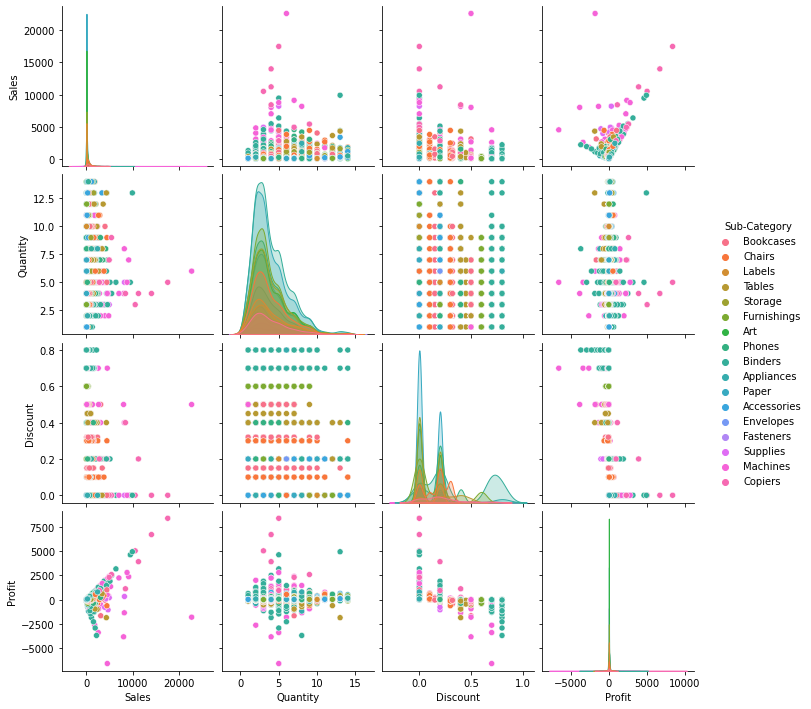

In [123]:
# Pair Plot - Sub-Category
# .pairplot() : To plot multiple pairwise bivariate distributions in a dataset

plt.Figure(figsize=(15,10))
sns.pairplot(dr_data,hue='Sub-Category')

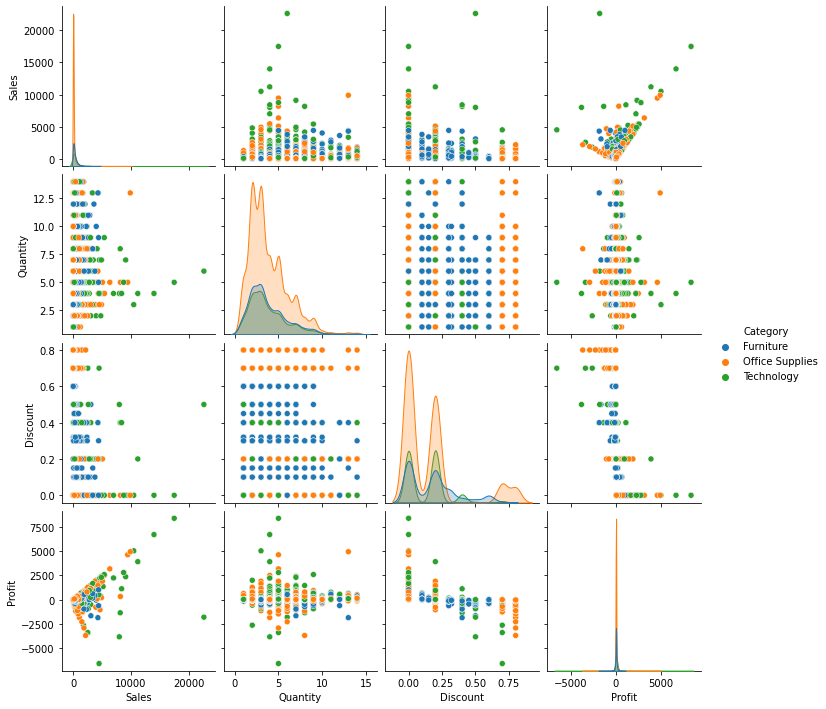

In [124]:
# Pair Plot - Category

plt.Figure(figsize=(15,10))
sns.pairplot(dr_data,hue='Category')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

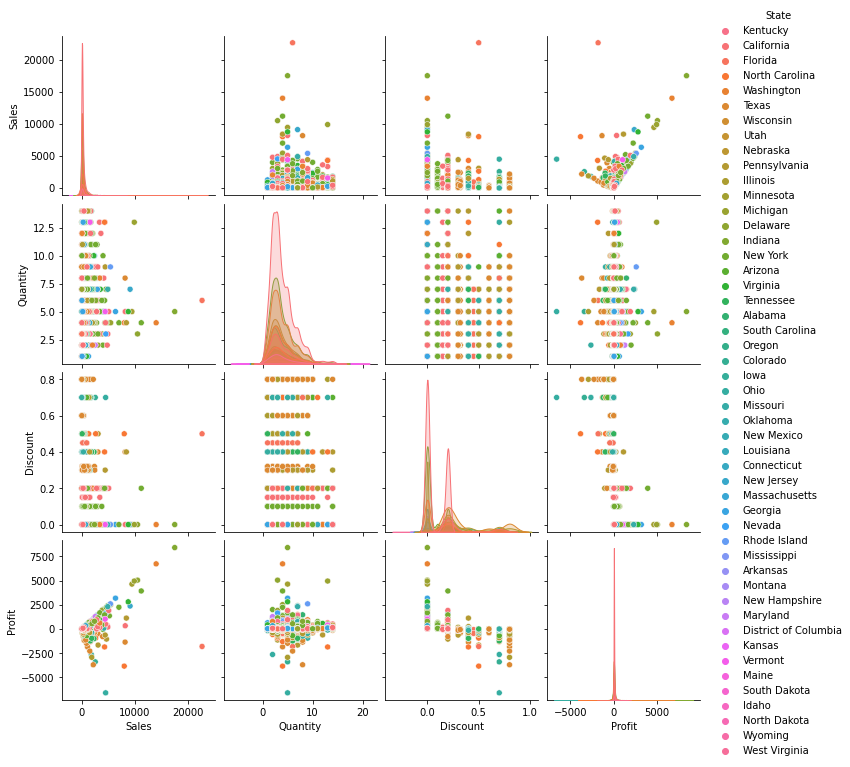

In [125]:
# Pair Plot - State

plt.Figure(figsize=(15,10))
sns.pairplot(dr_data,hue='State')

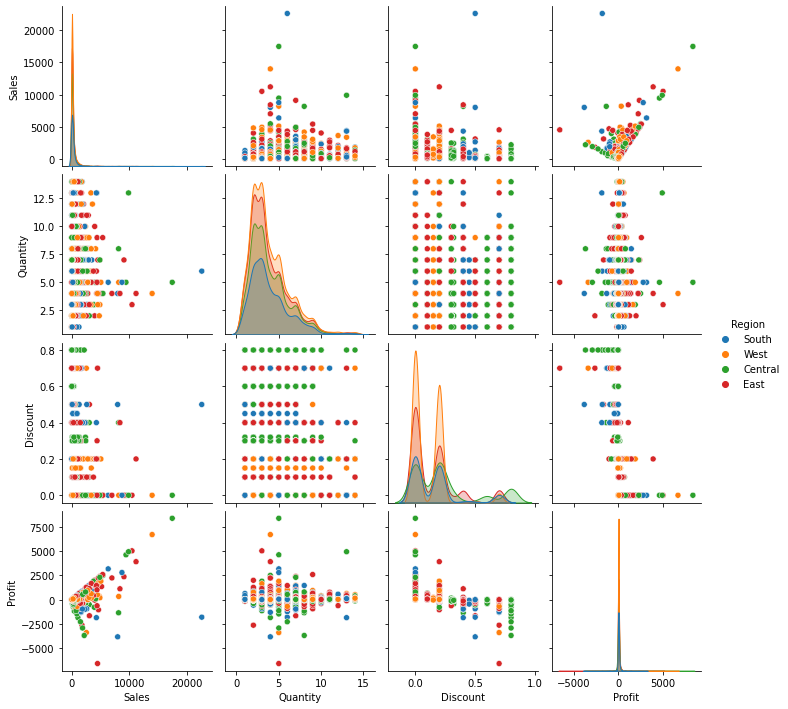

In [126]:
# Pair Plot - Region

plt.Figure(figsize=(15,10))
sns.pairplot(dr_data,hue='Region')